In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px

# Exploratory Analysis - "Access to Care"
`nchs_covid_mental_health_care.csv` contains survey estimates of responses to questions that ask if participants have accessed mental health care in the past 4 weeks.

In [27]:
df = pd.read_csv("nchs_covid_reduced_access_to_health_care.csv")

In [28]:
df.head(3)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,"Delayed Medical Care, Last 4 Weeks",National Estimate,United States,United States,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,38.7,38.1,39.4,38.1 - 39.4,NaN
1,"Delayed Medical Care, Last 4 Weeks",By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,34.8,32.5,37.2,32.5 - 37.2,NaN
2,"Delayed Medical Care, Last 4 Weeks",By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,04/23/2020,05/05/2020,37.3,35.6,39.0,35.6 - 39.0,NaN


### Granularity:
It should be noted that each row in the dataset represents the results of a finite survey period for a given group and subgroup

In [ ]:
We can see that each time period has roughly

In our broader Analysis, Indicator will be our dependent variable.  
Here is a frequency table of its values:

In [29]:
df["Indicator"].value_counts()

Delayed or Did Not Get Care, Last 4 Weeks    2379
Delayed Medical Care, Last 4 Weeks           2379
Did Not Get Needed Care, Last 4 Weeks        2360
Name: Indicator, dtype: int64

### Groups:
These are the major groupings with number of rows

In [30]:
df["Group"].value_counts()

By State                      5049
By Age                         749
By Race/Hispanic ethnicity     535
By Education                   428
By Sex                         214
National Estimate              107
By Disability status            36
Name: Group, dtype: int64

These are the first 20 rows of a dataset that shows groups with their subgroups along with row count

In [61]:
df.groupby(["Group", "Subgroup"]).count().iloc[:20, :1]

Indicator
Group                      Subgroup                                               
By Age                     18 - 29 years                                       107
                           30 - 39 years                                       107
                           40 - 49 years                                       107
                           50 - 59 years                                       107
                           60 - 69 years                                       107
                           70 - 79 years                                       107
                           80 years and above                                  107
By Disability status       With disability                                      18
                           Without disability                                   18
By Education               Bachelor's degree or higher                         107
                           High school diploma or GED                          107
                           Less than a high school diploma                     107
                           Some college/Associate's degree                     107
By Race/Hispanic ethnicity Hispanic or Latino                                  107
                           Non-Hispanic Asian, single race                     107
                           Non-Hispanic Black, single race                     107
                           Non-Hispanic White, single race                     107
                           Non-Hispanic, other races and multiple races        107
By Sex                     Female                                              107
                           Male                                                107

### Time Periods:
Each time period is roughly two weeks, and they typically each have 210 values representing the response values for some group/subgroup - but it should be noted that some response periods have less than 210 values...

In [67]:
df["Time Period End Date"] = df["Time Period End Date"].apply(pd.to_datetime)

In [68]:
(df
 .groupby(["Time Period End Date", "Time Period Label"])
 .count()
 .iloc[:, :1]
 .sort_index()
 .rename(columns={"Indicator": "Values"})
 .head(20))

,,Values
Time Period End Date,Time Period Label,
2020-05-05,Apr 23 - May 5,210
2020-05-12,May 7 - May 12,210
2020-05-19,May 14 - May 19,210
2020-05-26,May 21 - May 26,210
2020-06-02,May 28 - June 2,210
2020-06-09,June 4 - June 9,210
2020-06-16,June 11 - June 16,210
2020-06-23,June 18 - June 23,210
2020-06-30,June 25 - June 30,210


### General Time Trend

In [69]:
df_nat = df.query("Group == 'National Estimate'")

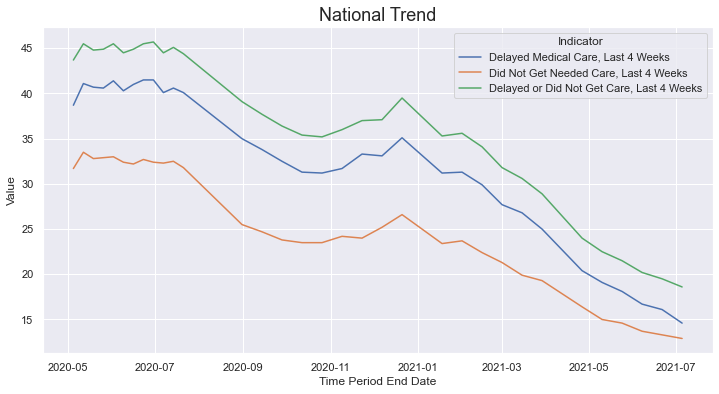

In [73]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_nat, x="Time Period End Date", y="Value", hue="Indicator")
plt.title("National Trend").set_fontsize(18);

In [84]:
fig = px.line(df_nat, x="Time Period End Date", y="Value", color="Indicator"); 
fig.show(); 

### Time Trend by State (California, Texas, New York, Florida)

In [71]:
df_state = df.query("Group == 'By State'")
df_big_states = df_state[df_state["State"].isin(["California", "Texas", "New York", "Florida"])]

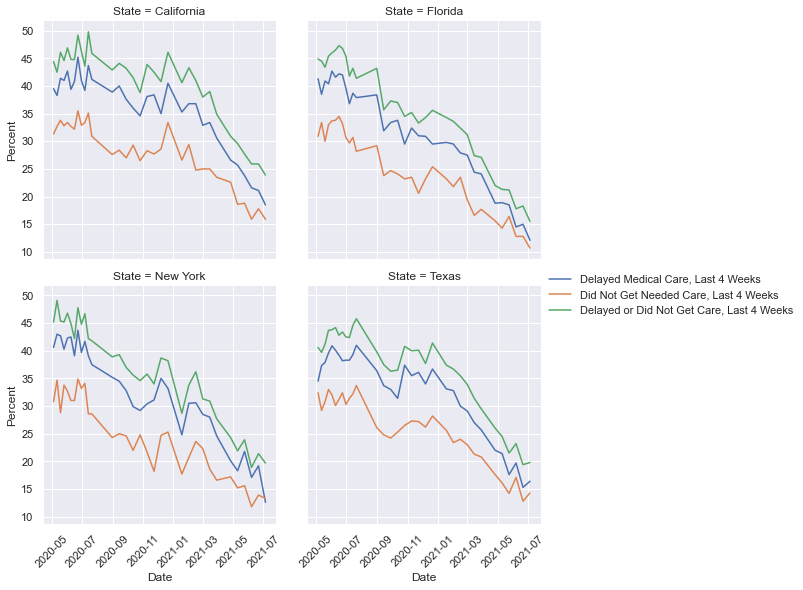

In [72]:
g = sns.FacetGrid(df_big_states, col="State", col_wrap=2, height=4)
g.map_dataframe(sns.lineplot, "Time Period End Date", "Value", "Indicator")
g.set_axis_labels("Date", "Percent")
g.add_legend()
g.set_xticklabels(rotation = 45);

### Time Trend by Race, Grid Plot:

In [79]:
df_race = df.query("Group == 'By Race/Hispanic ethnicity'")

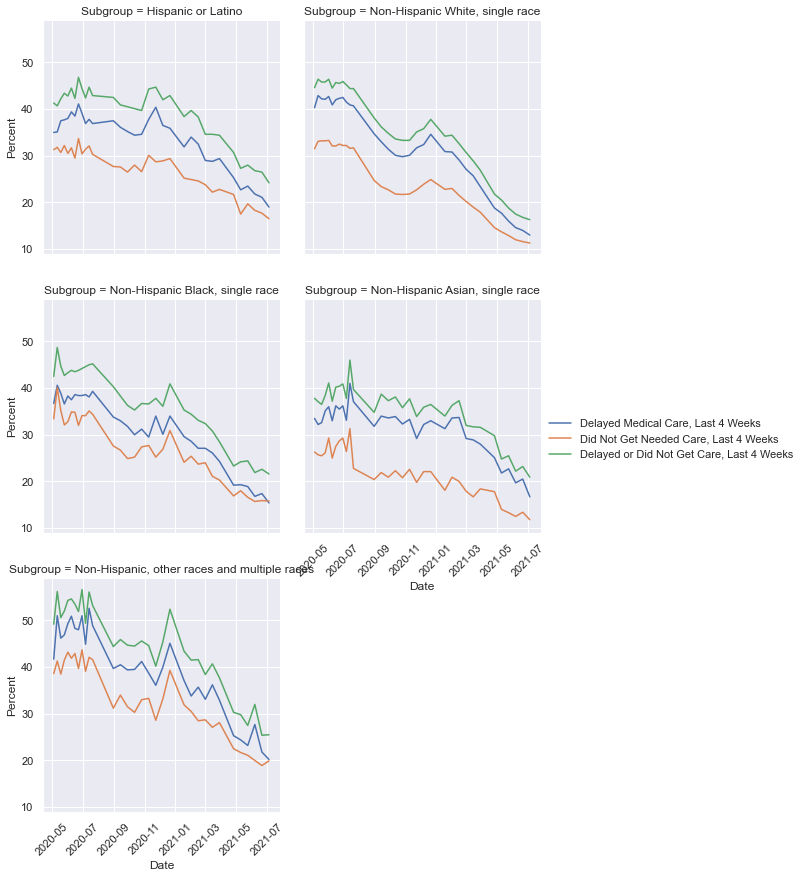

In [80]:
g = sns.FacetGrid(df_race, col="Subgroup", col_wrap=2, height=4)
g.map_dataframe(sns.lineplot, "Time Period End Date", "Value", "Indicator")
g.set_axis_labels("Date", "Percent")
g.add_legend()
g.set_xticklabels(rotation = 45);

### Time Trend by Race, One Plot

In [81]:
df_affected = df[df["Indicator"] == "Delayed or Did Not Get Care, Last 4 Weeks"]

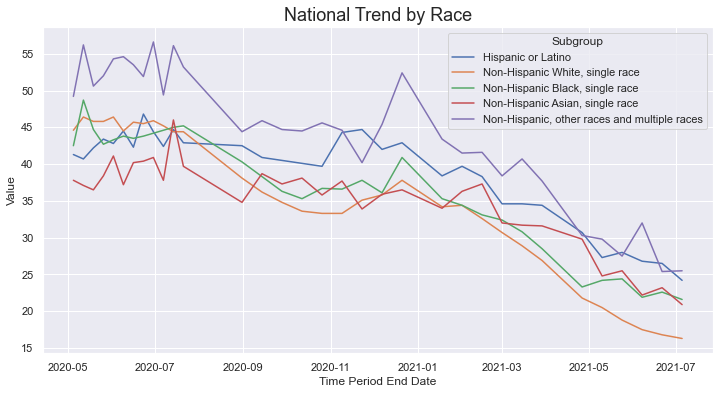

In [82]:
by_race = df_affected.query("Group == 'By Race/Hispanic ethnicity' & State == 'United States'")
plt.figure(figsize=(12, 6))
sns.lineplot(data=by_race,
             x="Time Period End Date", y="Value", hue="Subgroup")
plt.title("National Trend by Race").set_fontsize(18);

In [83]:
fig = px.line(by_race, x="Time Period End Date", y="Value", color="Subgroup"); 
fig.show(); 